#### Newton en dimensiones superiores

Queremos encontrar $\pmb{x}$ tal que $F(\pmb{x})=0$

![image.png](attachment:image.png)

es decir queremos encontrar $\pmb{x}=[x_1,x_2,\cdots,x_n]$ que satisfaga simultaneamente $f_i(\pmb{x})=0$ para $i=1,2,\cdots,n$

recordemos el esquema iterativo para Newton de una variable 
&nbsp;

$$
x_+=x_c-\frac{x_c}{f^{'}(x_c)}
$$

¿Cual es el problema cuando $f$ es una función que va de $\mathbb R^n \:\text{a}\:\mathbb R^n$ en diensiones mayores a 1,
la expansión en taylor se da en terminos de la matriz Jacobiana $\pmb{J}$ , que se define 

&nbsp; 
$$
\pmb{J}_{i,j}=\frac{\partial f_i}{\partial x_j} \quad (1)
$$

Asi que la derivada se da en terminos de una matriz , entonces dividir entre $f^{'}(x_c)$ no tiene sentido. Sin embargo el método de Newton se basa tambien en el desarrollo de Taylor 

&nbsp;

$$
\pmb{f(x+h)}\approx \pmb{f(x)+Jh}
$$
&nbsp;

Donde $\pmb{J}$  es el jacobiano de $\pmb{f}$, del mismo modo que el caso de dimensión 1, el esquema iterativo se obtiene igualando la ecuación (1) a cero , esto nos lleva al esquema iterativo 

&nbsp;

$$
\pmb{x_+}=\pmb{x_c}+\pmb{J^{-1}}\pmb{f(x_c)} \quad (2)
$$
&nbsp;
 En la paractica , la inversa del Jacobiano no se calcula la ecuación (2) se rearregla 
 
&nbsp;

$$
\pmb{Jh}=-f(x_c)
$$
&nbsp;

 Se resuelve para $\pmb{h}$ y se actualiza la iteración
&nbsp;

$$
\pmb{x_+}=\pmb{x_C}+\pmb{h}
$$
&nbsp;



#### Método de Newton : 
dos ecuaciones con dos incognitas

para $n=2$ el problema se puede expresar 
&nbsp;

$$
\begin{align}
f_1(x,y)&=0\\
f_2(x,y)&=0
\end{align}
$$
&nbsp;

La expansión de Taylor de primer orden nos da
&nbsp;

$$
\begin{align}
f_1(x+h,y+k)&\approx f_1(x,y)+hf_{1x}(x,y)+kf_{1y}(x,y)\\
f_2(x+h,y+k)&\approx f_2(x,y)+hf_{2x}(x,y)+kf_{2y}(x,y)
\end{align}
$$
&nbsp;

Resolviendo para $h$ y $k$ usando la regla de cramer
&nbsp;

$$
\begin{align}
h&=\frac{-f_1f_{2y}+f_2f_{1y}}{f_{1x}f_{2y}-f_{1y}f_{2x}}\\ 
k&=\frac{f_1f_{2x}-f_2f_{1x}}{f_{1x}f_{2y}-f_{1y}f_{2x}}
\end{align}\quad (3)
$$
&nbsp;

La nueva iteración en el metodo de Newton es
&nbsp;

$$
x_{n+1}=x_n+h;\quad y_{n+1}=y_{n+k}
$$
&nbsp;
Donde las $(h,k)$ están dadas por (3)

#### Ejemplo 1
Encuentre las coordenadas de la intersección en el primer cuadrante 
de la elipse $4x^2+y^2=4$ y la curva $x^2y^3=1$ cuya figura 
se muestra mas abajo

![image.png](attachment:image.png)

Una de las soluciones  está cerca de $(0.4,1.8)$  usaremos
este valor como punto como primera aproximación. las parciales 
de $f_1(x,y)=4x^2+y^2-4$ & $f_2(x,y)=x^2y^3-1$ son
&nbsp;

$$
\begin{align}
f_{1x}&=8x,  &f_{1y}&=2y\\
f_{2x}&=2xy^3, &f_{2y}&=3x^2y^2
\end{align}
$$
&nbsp;

Enel punto $(0.4,1.8)$ tenemos
&nbsp;

$$
\begin{align}
f_{1}&=4(0.4)^2+1.8^2-4=-0.12\\
f_{2}&=(0.4)^21.8^3-1=-0.06688
\end{align}
$$
&nbsp;
 
 Y las parciales 
 
&nbsp;

$$
\begin{align}
f_{1x}&=3.2,f_{1y}=3.6\\
f_{2x}&=4.6656,f_{2y}=1.5552
\end{align}
$$

&nbsp;

Así
&nbsp;

$f_{1x}f_{2y}-f_{1y}f_{2x}=(3.2)(1.5552)-(3.6)(4.6656)=-11.81952$
&nbsp;

Aplicando (3) obtenemos
&nbsp;

$$
\begin{align}
h=4.5808967x10^{-3}\\
k=2.961425x10^{-2}
\end{align}
$$

&nbsp;

$$
\begin{align}
x_1=0.4+4.5808967x10^{-3}=0.4045809\\
y_1=1.8+2.961425x10^{-2}=1.829614
\end{align}
$$

In [ ]:
import numpy as np
def eq2(v):
    x,y=v
    f=np.empty(2)
    f[0]=4*x**2+y**2-4
    f[1]=x**2*y**3-1
    return f

In [ ]:
def Deq2(v):
    x,y=v
    J=np.empty((2,2))
    J[0,0]=8*x
    J[0,1]=1*y
    J[1,0]=1*x*y**3
    J[1,1]=3*x**2*y**2
    return J

In [ ]:
def newton2(fcn,jac,g,tol):
    old=np.zeros_like(g)
    old[0]=g[0]+1
    while (abs(np.sqrt(np.dot(g-old,g-old))>tol)):
        old=g
        f=fcn(old)
        f1=f[0]
        f2=f[1]
        j=jac(old)
        f1x=j[0,0]
        f1y=j[0,1]
        f2x=j[1,0]
        f2y=j[1,1]
        D=f1x*f2y-f1y*f2x
        h=(f2*f1y-f1*f2y)/D
        k=(f1*f2x-f2*f1x)/D
        g=old+np.array((h,k))
    return g



In [ ]:
s=newton2(eq2,Deq2,[.8,1.2],1e-8)
print(s)

[0.82168162 1.13989352]


Resuelva el ejemplo 1 con el codigo de abajo

Text(0.5, 0, '$x$')

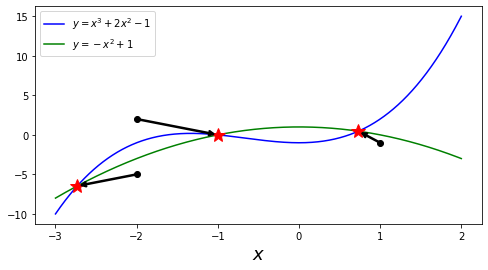

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 23 09:44:02 2020

@author: Francisco Salem
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize  import fsolve
def f(x):
 return [x[1] - x[0]**3 - 2 * x[0]**2 + 1,
 x[1] + x[0]**2 - 1]

x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y1, 'b', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'g', lw=1.5, label=r'$y = -x^2 + 1$')
x_guesses = [[-2, 2], [1, -1], [-2, -5]]
for x_guess in x_guesses:
     sol = fsolve(f, x_guess)
     ax.plot(sol[0], sol[1], 'r*', markersize=15)
     ax.plot(x_guess[0], x_guess[1], 'ko')
     ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0],
                 x_guess[1]),arrowprops=dict(arrowstyle="->", linewidth=2.5)) 
ax.legend(loc=0)
ax.set_xlabel(r'$x$', fontsize=18)



In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 27 13:41:06 2014

@author: dr-x
"""

## module swap
''' swapRows(v,i,j).
    Swaps rows i and j of vector or matrix [v].

    swapCols(v,i,j).
    Swaps columns i and j of matrix [v].
'''    
def swapRows(v,i,j):
    if len(v.shape) == 1: v[i],v[j] = v[j],v[i]
    else:
        temp = v[i].copy()
        v[i] = v[j]
        v[j] = temp
   
def swapCols(v,i,j):
    temp = v[:,j].copy()
    v[:,j] = v[:,i]
    v[:,i] = temp


In [ ]:
## module swap
''' swapRows(v,i,j).
    Swaps rows i and j of vector or matrix [v].

    swapCols(v,i,j).
    Swaps columns i and j of matrix [v].
'''    
def swapRows(v,i,j):
    if len(v.shape) == 1: v[i],v[j] = v[j],v[i]
    else:
        temp = v[i].copy()
        v[i] = v[j]
        v[j] = temp
   
def swapCols(v,i,j):
    temp = v[:,j].copy()
    v[:,j] = v[:,i]
    v[:,i] = temp

# -*- coding: utf-8 -*-
"""
Created on Thu Nov 27 13:34:06 2014

@author: dr-x
"""

from numpy import zeros,argmax,dot
#from prg_swap import swap
#import error

def gaussPivot(a,b,tol=1.0e-9):
    n = len(b)
# Set up scale factors
    s = zeros(n)
    for i in range(n):
        s[i] = max(abs(a[i,:]))
    for k in range(0,n-1):
# Row interchange, if needed
        p = argmax(abs(a[k:n,k])/s[k:n]) + k
        if abs(a[p,k]) < tol:
            error.err("Matrix is singular")
        if p != k:
            swapRows(b,k,p)
            swapRows(s,k,p)
            swapRows(a,k,p)
            
            # Elimination
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a [i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    if abs(a[n-1,n-1]) < tol:
        error.err("Matrix is singular")
# Back substitution
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    return b

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 18 09:11:52 2020

@author: Francisco Salem
"""
import numpy as np
#from prg_gaussPivot import gaussPivot

def newtonRaphson2(f,x,tol=1.0e-9):
    
    def jacobian(f,x):
        h = 1.0e-4
        n = len(x)
        jac = np.zeros((n,n))
        f0 = f(x)
        for i in range(n):
            temp = x[i]
            x[i] = temp + h
            f1 = f(x)
            x[i] = temp
            jac[:,i] = (f1 - f0)/h
        return jac,f0
        
    for i in range(30):
        jac,f0 = jacobian(f,x)
        if np.sqrt(np.dot(f0,f0)/len(x)) < tol: return x
        dx = gaussPivot(jac,-f0)
        x = x + dx
        if np.sqrt(np.dot(dx,dx)) < tol*max(max(abs(x)),1.0): return x
    print ("Demasiadas  iteraciones")

In [ ]:
import numpy as np
def f(x):
    f=np.zeros(len(x))
    f[0]=np.sin(x[0])+x[1]**2+np.log(x[2])-7.0
    f[1]=3*x[0]+3*x[1]-x[2]**3+1.0
    f[2]=x[0]+x[1]+x[2]-5.0
    return f
    

In [ ]:
x=np.array([1.0,1.0,1.0])
print(newtonRaphson2(f,x))
input("\nPresione la tecla enter para salir")

[0.46566337 2.40756729 2.12676933]

Presione la tecla enter para salir


''